In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install fastbook

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 19.0 MB/s eta 0:00:00


In [3]:
from fastbook import *

# Download images of different bear categories
def download_images_ddg(img_category, img_types, num_images):
    if not path.exists():
        path.mkdir()
        for o in img_types:
            dest = (path/o)
            dest.mkdir(exist_ok=True)
            results = search_images_ddg(f'{str(o)} {img_category}', max_images=num_images)
            for u in range(len(results)):
                try:
                    download_url(url=results[u], 
                                 dest=f'{dest}/{str(o)}-{str(u+1)}.jpg', 
                                 timeout=400, 
                                 show_progress=False)
                except:
                    print(f'not found {results[u]}')
                    continue

In [4]:
import shutil

def delete_directory(user_input, img_category, img_types):
    if user_input == 'y'.lower():
        try:
            for t in img_types:
                shutil.rmtree(f'{img_category}/{t}') # delete each image type subfolder
            shutil.rmtree(f'{img_category}') # delete main folder
        except:
            print('No directories found')
    else:
        pass

In [5]:
import pathlib
from pathlib import Path

# Define image category and image types
img_category = 'bears'
img_types = ['grizzly','black','teddy']
path = Path(img_category)

In [6]:
#user_input = str(input('Would you like to delete directories? [y/n]'))
#delete_directory(user_input, img_category, img_types)

In [7]:
from fastai.vision.all import download_images

# Call function to download images
download_images_ddg(img_category, img_types, num_images=150)


not found https://critter.science/wp-content/uploads/2018/08/griz6.jpg
not found http://bearlegend.com/wp-content/uploads/2012/03/grizzlyBear_photofurl.jpeg
not found http://www.firstpeople.us/pictures/bear/1024x768/grizzly-bear-face-on-1024x768.jpg
not found http://www.firstpeople.us/pictures/bear/1600x1200/Forest_Wild_Grizzly_Bear-1600x1200.jpg
not found https://animalia-life.com/data_images/grizzly-bear/grizzly-bear4.jpg
not found https://animalia-life.com/data_images/grizzly-bear/grizzly-bear7.jpg
not found http://bearlegend.com/wp-content/uploads/2012/04/2950810812_16faa4ae08_o.jpg
not found http://www.akronzoo.org/Data/Sites/1/media/GalleryImages/105/WebImages/grizzly-bear-hero-5.jpg
not found https://kgmi-am.sagacom.com/wp-content/blogs.dir/70/files/2017/05/Black-Bear.jpg
not found https://www.jmpeltier.com/travelogues/wp-content/uploads/MG_9063-Edit.jpg
not found https://circawanderlust.com/wp-content/uploads/2019/05/black-bears-1972307_1920.jpg
not found https://www.rd.com/wp-

In [8]:
# Check for failed images
fns = get_image_files(path)
failed = verify_images(fns)
failed.map(Path.unlink);

In [9]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)



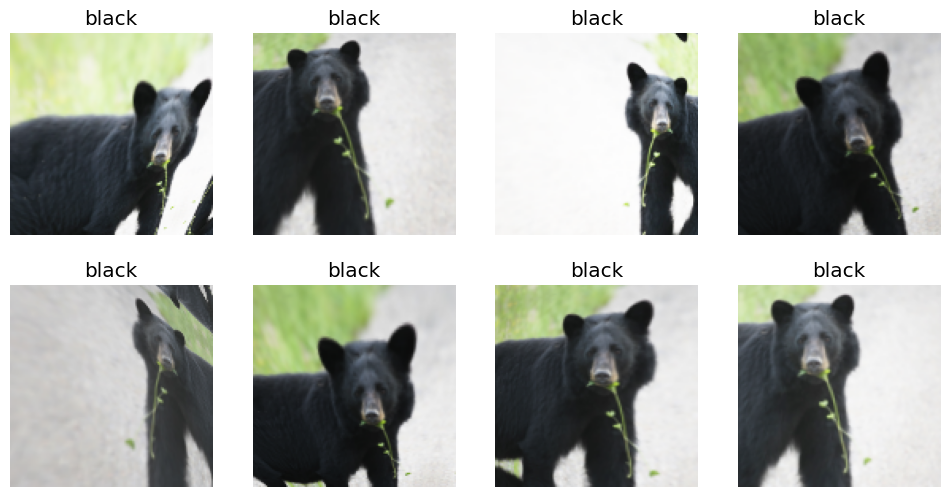

In [10]:
#bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [11]:
bears = bears.new(
 item_tfms=RandomResizedCrop(224, min_scale=0.5),
 batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

In [12]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)


/opt/conda/lib/python3.10/site-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 264MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.432962,0.208904,0.048780,00:42


epoch,train_loss,valid_loss,error_rate,time
0,0.250784,0.225337,0.048780,00:55
1,0.192197,0.204448,0.024390,00:56
2,0.161713,0.236757,0.036585,00:56
3,0.138947,0.252748,0.036585,00:55


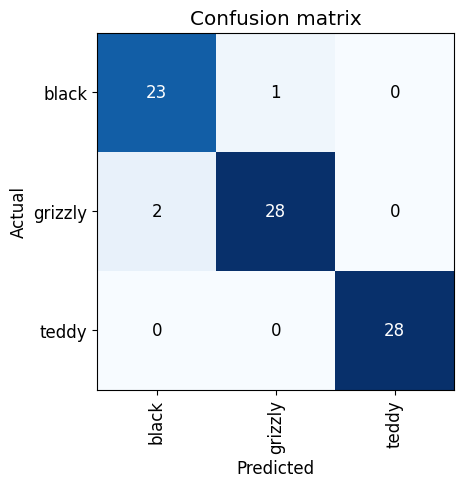

In [13]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()


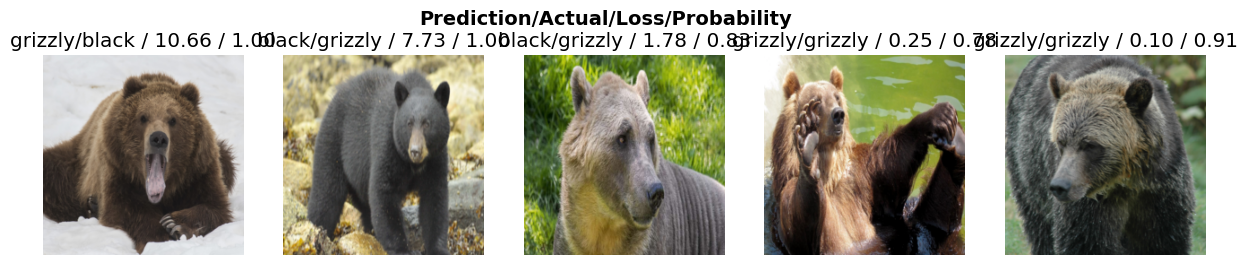

In [14]:
interp.plot_top_losses(5, nrows=1)

In [15]:
from fastai.vision.widgets import *
cleaner = ImageClassifierCleaner(learn)
cleaner
